# **Support Vector Machines on Parkinson's Disease Dataset**
#### Detecting Parkinson’s Disease

---

**Name**: Joshua Wilkinson

**Student Number**: C00262503

### Change Log
- added most of the code from the notebook but excluded the Face Recognition example.
- decided to use a Parkinson's Disease dataset 
- fitted a new svm model with the parkinson's data
- I found when creating a model you must choose the type of kernel you wish to use, so I decided to test out all of the available ones from sklearn. Here are the names and accuracies:

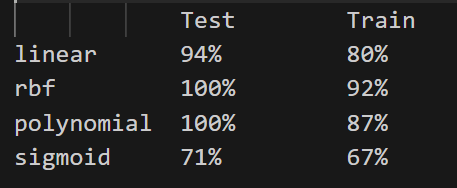

- I found that the rbf kernel fitted best with the data from the parkinsons dataset. The linear and polynomial kernels didn't perform too badly either, and the sigmoid kernel performed the worst.
- I also messed around with the guassian quantiles, making a plot of the data at the end of the notebook.

## Import useful Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Motivating Support Vector Machines

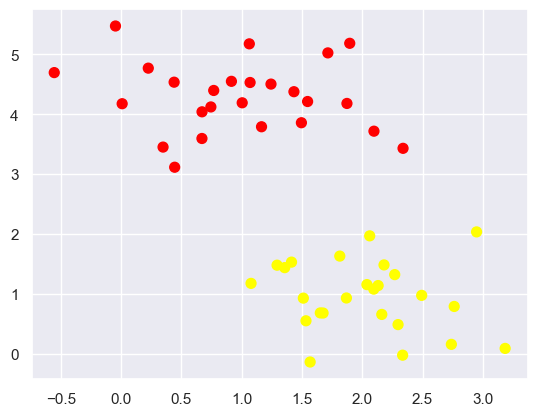

In [2]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

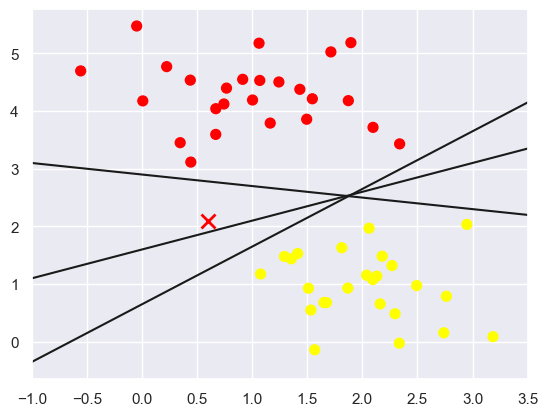

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

# Support Vector Machines: Maximizing the Margin

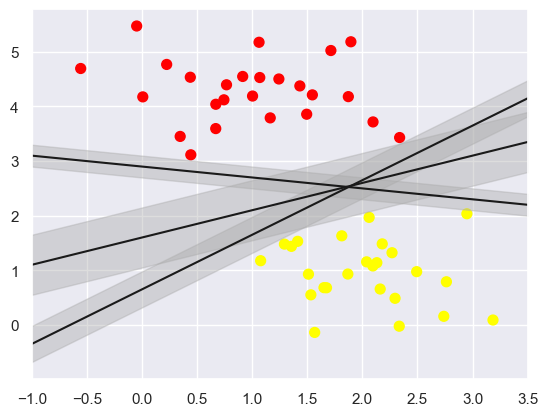

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

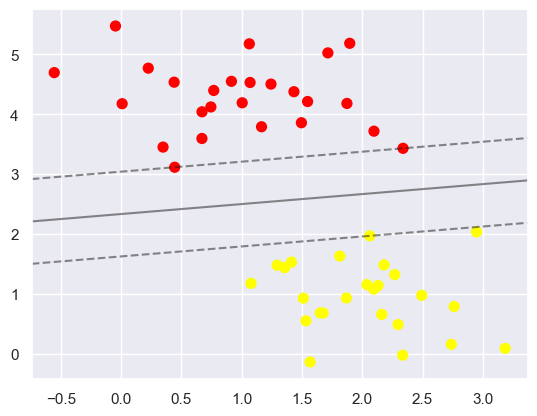

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

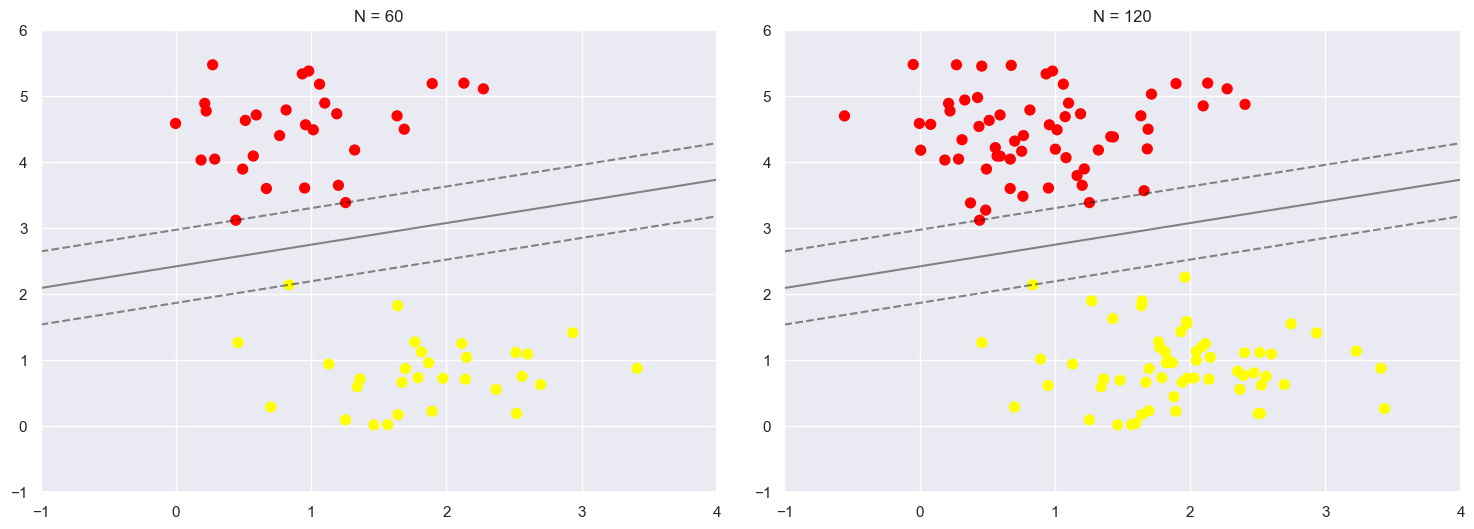

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

### Beyond Linear Boundaries: Kernel SVM

Where SVM can become quite powerful is when it is combined with *kernels*.
We have seen a version of kernels before, in the basis function regressions of [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).
There we projected our data into a higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea.
To motivate the need for kernels, let's look at some data that is not linearly separable (see the following figure):

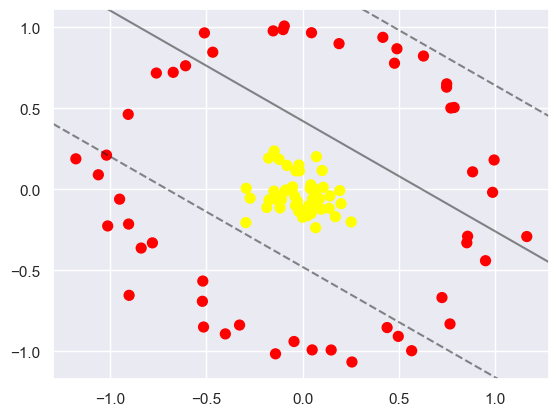

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [12]:
r = np.exp(-(X ** 2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot, as seen in the following figure:

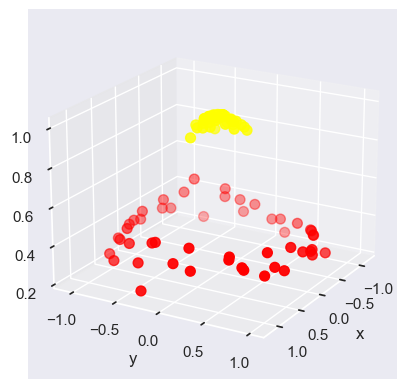

In [13]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

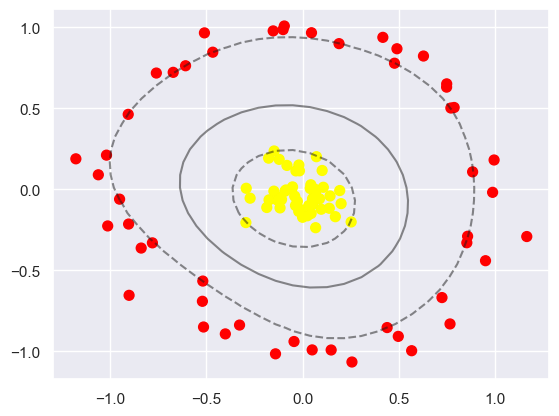

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?
For example, you may have data like this (see the following figure):

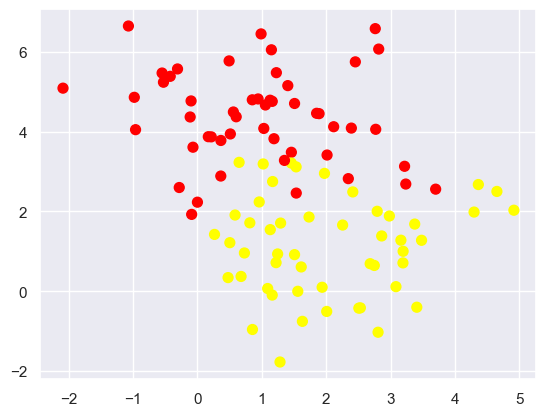

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

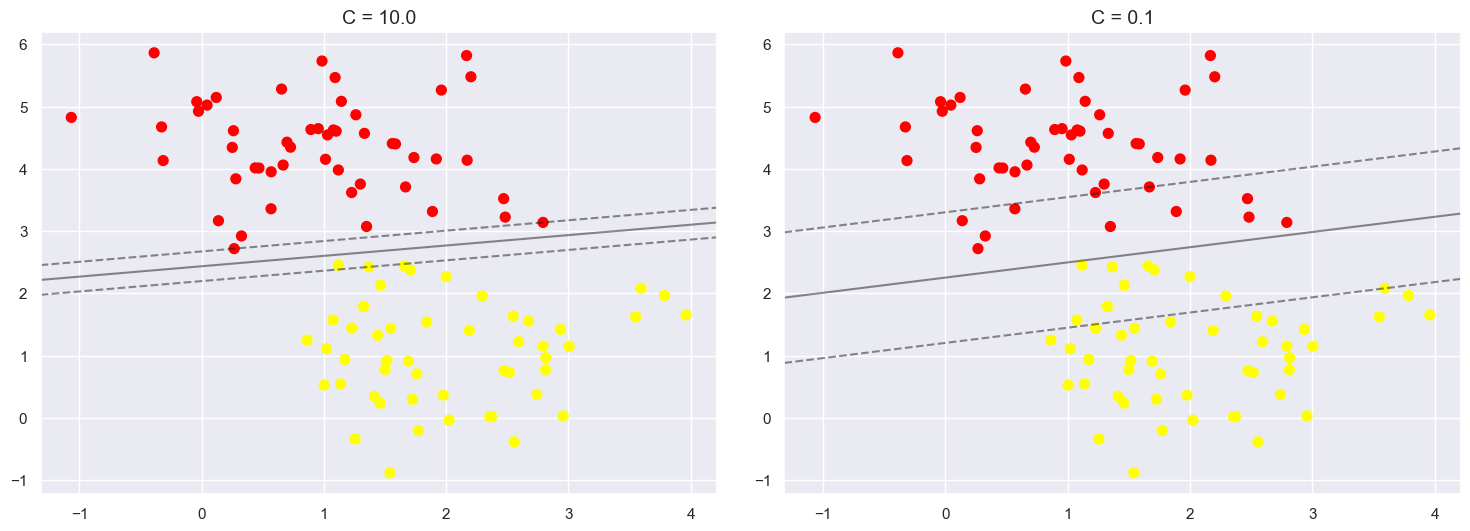

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of `C` will depend on your dataset, and you should tune this parameter using cross-validation or a similar procedure (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)).

# Example: Parkinson's Disease Detection

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Data analysis/cleaning

In [19]:
# loading file to a pandas dataframe
parkinsons_data = pd.read_csv('parkinsons.data')

In [20]:
# peaking at the top 5 rows
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Status: 1 = Parkinson's , 0 = No Parkinson's

In [21]:
parkinsons_data.shape
# there are 195 rows and 24 columns

(195, 24)

In [22]:
# let's get some more info
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Attribute Information:
Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of the ratio of noise to tonal components in the voice

status - The health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [23]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [24]:
# getting some stats measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Data Preprocessing

In [25]:
# seperating features and target variables
X = parkinsons_data.drop(columns=['name','status'], axis=1)
y = parkinsons_data['status']

In [26]:
# split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
123,182.018,197.173,79.187,0.00842,0.00005,0.00506,0.00449,0.01517,0.02503,0.231,...,0.01931,0.04115,0.01813,18.784,0.589956,0.732903,-5.445140,0.142466,2.174306,0.215558
160,114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,0.406,...,0.04114,0.04736,0.02073,20.437,0.653139,0.694571,-5.185987,0.259229,2.151121,0.244948
94,157.821,172.975,68.401,0.00358,0.00002,0.00196,0.00196,0.00587,0.03716,0.307,...,0.02764,0.06185,0.00850,22.219,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
57,117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,...,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464
41,184.055,196.537,166.977,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,241.404,248.834,232.483,0.00281,0.00001,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
22,167.930,193.221,79.068,0.00442,0.00003,0.00220,0.00247,0.00661,0.04351,0.377,...,0.04246,0.06685,0.01280,22.468,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
72,120.080,139.710,111.208,0.00405,0.00003,0.00180,0.00220,0.00540,0.01706,0.152,...,0.01345,0.02921,0.00442,25.742,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180
15,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,0.126,...,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589


In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Kernels

### SVM Model, kernel = linear

In [42]:
model = svm.SVC(kernel='linear', gamma=1, C=10)

In [43]:
model.fit(X_train, Y_train)

SVC(C=10, gamma=1, kernel='linear')

In [44]:
# prediction using training data
y_pred = model.predict(X_train)

In [45]:
# accuracy on training data, should not be suprising
train_accuracy = accuracy_score(Y_train, y_pred)
print("Train data accuracy: ", train_accuracy)

Train data accuracy:  0.9423076923076923


In [47]:
# prediction using test data
y_pred = model.predict(X_test)

In [48]:
# accuracy on test data, should differnt
test_accuracy = accuracy_score(Y_test, y_pred)
print("Train data accuracy: ", test_accuracy)

Train data accuracy:  0.7948717948717948


### SVM Model, kernel = Polynomial

In [50]:
model = svm.SVC(kernel='poly', gamma=1, C=10)

model.fit(X_train, Y_train)

# prediction using training data
y_pred = model.predict(X_train)

# accuracy on training data, should not be suprising
train_accuracy = accuracy_score(Y_train, y_pred)
print("Train data accuracy: ", train_accuracy)

# prediction using test data
y_pred = model.predict(X_test)

# accuracy on test data, should differnt
test_accuracy = accuracy_score(Y_test, y_pred)
print("Train data accuracy: ", test_accuracy)

Train data accuracy:  1.0
Train data accuracy:  0.8717948717948718


### SVM Model, kernel = sigmoid

In [51]:
model = svm.SVC(kernel='sigmoid', gamma=1, C=10)

model.fit(X_train, Y_train)

# prediction using training data
y_pred = model.predict(X_train)

# accuracy on training data, should not be suprising
train_accuracy = accuracy_score(Y_train, y_pred)
print("Train data accuracy: ", train_accuracy)

# prediction using test data
y_pred = model.predict(X_test)

# accuracy on test data, should differnt
test_accuracy = accuracy_score(Y_test, y_pred)
print("Train data accuracy: ", test_accuracy)

Train data accuracy:  0.7051282051282052
Train data accuracy:  0.6666666666666666


### SVM Model, kernel = rbf

In [33]:
model = svm.SVC(kernel='rbf', gamma=1, C=10)

In [34]:
model.fit(X_train, Y_train)

SVC(C=10, gamma=1)

In [35]:
X_train[:]

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

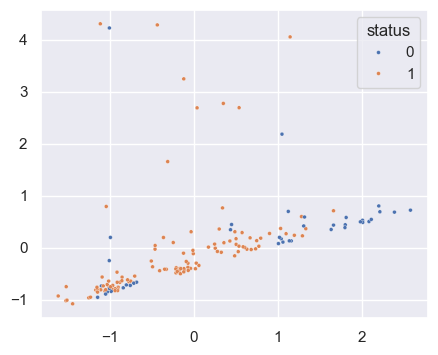

In [36]:
plt.figure(figsize=(5, 4))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=Y_train, 
                s=8);
# Constructing a hyperplane using a formula.
#w = model.coef_[0]           # w consists of 2 elements
#b = model.intercept_[0]      # b consists of 1 element
#x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
#y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
#plt.plot(x_points, y_points, c='r');
plt.show()

In [37]:
# prediction using training data
y_pred = model.predict(X_train)

In [38]:
# accuracy on training data, should not be suprising
train_accuracy = accuracy_score(Y_train, y_pred)
print("Train data accuracy: ", train_accuracy)

Train data accuracy:  1.0


In [39]:
# prediction using test data
y_pred = model.predict(X_test)

In [40]:
# accuracy on test data, should differnt
test_accuracy = accuracy_score(Y_test, y_pred)
print("Train data accuracy: ", test_accuracy)

Train data accuracy:  0.9230769230769231


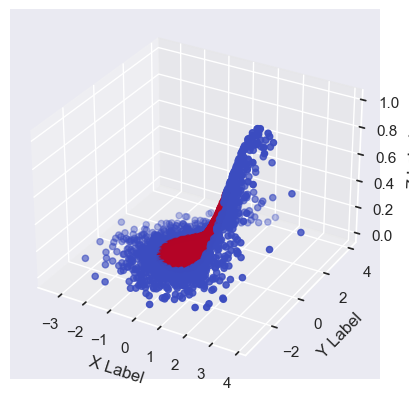

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colors definition
colors = {
0: '#b40426',
1: '#3b4cc0',
2: '#f2da0a',
3: '#fe5200'
# ... and so on
}

# Generate data
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=2500, mean=(2,3))

# Scale data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Generate Z component
z = RBF(1.0).__call__(X)[0]

# Plot
colors = list(map(lambda x: colors[x], y))
ax.scatter(X[:, 0], X[:, 1], z, c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

End of notebook.

# References
- [Jake VanderPlas. Python Data Science Handbook. 05_07_Support_Vector_Machines.ipynb. GitHub](https://github.com/jakevdp/PythonDataScienceHandbook)
- [Hopkins,Mark, Reeber,Erik, Forman,George, and Suermondt,Jaap. (1999). Spambase. UCI Machine Learning Repository.](https://doi.org/10.24432/C53G6X)